In [29]:
import numpy as np
import numpy.random as nrd
import matplotlib.pyplot as plt

import lib_PRIM as prim

Here we test our implementation of PRIM with a simple two-dimensional example we can visualize.

In [31]:
N = 1000
features = 2
x_min = 0
x_max = 1

# Create random points in a two-dimension region
X = nrd.uniform(x_min,x_max,size=(N,features))

# We add two bumps (these will be where y = 1, else 0)
bumps = [
         [[0.25,0.80],[0.60,0.90]],
         [[0.75,0.90],[0.10,0.30]]
        ]

bool_bumps = []
for bump in bumps:
    bool_inside = []
    for p in range(features):
        bool_inside.append(X[:,p] >= bump[p][0])
        bool_inside.append(X[:,p] <= bump[p][1]) 
    bool_bumps.append(np.all(bool_inside,axis=0))
    
bool_category = np.any(bool_bumps,axis=0)

# Set the response vector
y = np.zeros(N)
y[bool_category] = 1

Let us visualize the data,

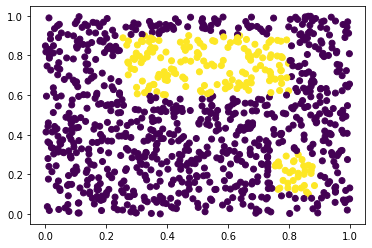

In [32]:
plt.scatter(*X.T, c=y)
plt.show()

And test that our implementation of PRIM works as expected,

In [33]:
boxes = prim.PRIM(X,y,num_boxes=2,use_cv=False)
N,features = X.shape

# Print a summary of the resulting boxes
for i,box in enumerate(boxes):
    contained = prim.contained_observations(X,box)
    N_box = np.sum(contained)
    y_average = np.mean(y[contained])
    print('--- Box {} ---'.format(i+1))
    print('Average y = {:.2f}'.format(y_average))
    for p in range(features):
          print('Feature : {} - x_min = {:.2f} , x_max = {:.2f}'.format(p,box[p],box[features+p]))
    print('Coverage = {:.2f}'.format(N_box/N))

--- Box 1 ---
Average y = 1.00
Feature : 0 - x_min = 0.26 , x_max = 0.80
Feature : 1 - x_min = 0.60 , x_max = 0.90
Coverage = 0.15
--- Box 2 ---
Average y = 1.00
Feature : 0 - x_min = 0.76 , x_max = 0.88
Feature : 1 - x_min = 0.10 , x_max = 0.30
Coverage = 0.03
